In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from collections import OrderedDict
from scipy.interpolate import make_interp_spline


In [2]:
plt.rcParams['font.sans-serif'] = ['DFKai-SB'] 
plt.rcParams['axes.unicode_minus'] = False

In [3]:
linestyles_dict = OrderedDict(
    [('solid',               (0, ())),
     ('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])

In [4]:
df = pd.read_excel(r'5-1光學實驗結報.xlsx', sheet_name='Sheet1',usecols="A:N", names="ABCDEFGHIJKLMN")
df.to_excel(r'5-1光學實驗結報.xlsx',index=False)
df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,刻度,光功率uW,NaN,刻度,光功率uW,NaN,刻度,光功率uW,NaN,刻度,光功率uW
2,NaN,NaN,NaN,0,0.2,NaN,0,309,NaN,0,381,NaN,0,817
3,NaN,NaN,NaN,10,32.6,NaN,10,374,NaN,10,380,NaN,10,805
4,NaN,NaN,NaN,20,107.4,NaN,20,436,NaN,20,378,NaN,20,740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,0.00028,0.000219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,0.00059,0.000461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,0.00122,0.000952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,0.00224,0.001749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Table_1= df.loc[2:38, 'D':'E']
Table_2= df.loc[2:38, 'G':'H']
Table_3= df.loc[2:38, 'J':'K']
Table_4= df.loc[2:38, 'M':'N']

In [6]:
X = Table_1['D'].values.astype(float)
Y_0 = Table_1['E'].values.astype(float)
Y_4_30 = Table_2['H'].values.astype(float)
Y_4_45 = Table_3['K'].values.astype(float)
Y_2_45 = Table_4['N'].values.astype(float)

In [85]:
#理論數值 T_i = 0.5 T_0^2 cos^2
I_i = 811.2
T_0_sqrt = np.sqrt(1)
X_real = np.arange(0, 360, 0.1)
X_real_rad = np.radians(X_real-90)
Y_real = I_i*np.cos(X_real_rad)**2

# 1/4波版 30
I_45 = 0.5*I_i
X_QWP_rad = np.radians(X_real-90+30)
Y_real_30 = I_45*np.cos(X_QWP_rad)**2+ 0.25*I_i

# 1/4波版 45


Y_real_45 = 0.5*I_i+np.cos(X_QWP_rad)*0

# 1/2波版 45

X_HWP_rad = np.radians(X_real-90+90)
Y_real_H = I_i*np.cos(X_HWP_rad)**2
print(I_45)

405.6


In [86]:
#for smooth curve
X_Y_Spline_1 = make_interp_spline(X, Y_0)
X_Y_Spline_2 = make_interp_spline(X, Y_4_30)
X_Y_Spline_3 = make_interp_spline(X, Y_4_45)
X_Y_Spline_4 = make_interp_spline(X, Y_2_45)

#Table_1
X_ = np.linspace(X.min(), X.max(), 500)
Y_0_ = X_Y_Spline_1(X_)

#Table_2
X_ = np.linspace(X.min(), X.max(), 500)
Y_4_30_ = X_Y_Spline_2(X_)

#Table_3
X_ = np.linspace(X.min(), X.max(), 500)
Y_4_45_ = X_Y_Spline_3(X_)

#Table_4
X_ = np.linspace(X.min(), X.max(), 500)
Y_2_45_ = X_Y_Spline_4(X_)


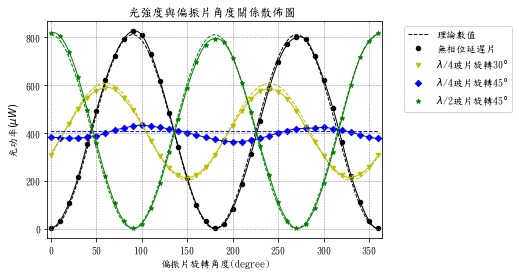

In [87]:
fig, ax= plt.subplots()

ax.set(xlabel = '偏振片旋轉角度(degree)', ylabel = '光功率'+r'$(\mu W)$', 
       title = "光強度與偏振片角度關係散佈圖 ")   
ax.set_xlim(-4, 364)
#Table_1
ax.scatter(X,
            Y_0,
            c = "k",                                  
            s = 20,                                  
            alpha = 1,
            label = '無相位延遲片',
            marker = "o")
ax.plot(X_,
        Y_0_,
        linestyle = '-',
        linewidth = 1,
        c = "k")

ax.plot(X_real, 
        Y_real, 
        linestyle = '--',
        linewidth = 1,
        label ="理論數值",
        c = "k")
#Table_2
ax.scatter(X,
            Y_4_30,
            c = "y",                                  
            s = 20,                                  
            alpha = 1,
            label = r"$\lambda$/4玻片旋轉30$\degree$",
            marker = "v")
ax.plot(X_,
        Y_4_30_,
        linestyle = '-',
        linewidth = 1,
        c = "y")

ax.plot(X_real, 
        Y_real_30, 
        linestyle = '--',
        linewidth = 1,
        c = "y")
#Table_3
ax.scatter(X,
            Y_4_45,
            c = "b",                                  
            s = 20,                                  
            alpha = 1,
            label =r"$\lambda$/4玻片旋轉45$\degree$",
            marker = "D")
ax.plot(X_,
        Y_4_45_,
        linestyle = '-',
        linewidth = 1,
        
        c = "b")

ax.plot(X_real, 
        Y_real_45, 
        linestyle = '--',
        linewidth = 1,
        c = "b")
#Table_4
ax.scatter(X,
            Y_2_45,
            c = "g",                                  
            s = 20,                                  
            alpha = 1,
            label =r"$\lambda$/2玻片旋轉45$\degree$",
            marker = "*")
ax.plot(X_,
        Y_2_45_,
        linestyle = '-',
        linewidth = 1,
        c = "g")

ax.plot(X_real, 
        Y_real_H, 
        linestyle = '--',
        linewidth = 1,
        c = "g")

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

lg = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.savefig('實驗5-1數據.png', 
            dpi=500, 
            format='png', 
            bbox_extra_artists=(lg,), 
            bbox_inches='tight')

plt.show()

In [62]:
#實驗2
Table_5 = df.loc[66:72, 'D':'F']
Table_6 = df.loc[66:72, 'J':'L']
Table_7 = df.loc[77:99, 'D':'F']

x_1 = Table_5["D"].values.astype("float")
x_2 = Table_7["D"][:11].values.astype("float")
y_TE_b = Table_5["F"].values.astype("float")
y_TM_b = Table_6["L"].values.astype("float")
y_TM_s = Table_7["F"][12:].values.astype("float")


In [63]:
#for smooth curve
X_Y_Spline_5 = make_interp_spline(x_1, y_TE_b)
X_Y_Spline_6 = make_interp_spline(x_1, y_TM_b)
X_Y_Spline_7 = make_interp_spline(x_2, y_TM_s)

#Table_5
x_1_ = np.linspace(x_1.min(), x_1.max(), 500)
y_TE_b_ = X_Y_Spline_5(x_1_)

#Table_6
x_1_ = np.linspace(x_1.min(), x_1.max(), 500)
y_TM_b_ = X_Y_Spline_6(x_1_)

#Table_7
x_2_ = np.linspace(x_2.min(), x_2.max(), 500)
y_TM_s_ = X_Y_Spline_7(x_2_)

In [127]:
#理論 TE TM
n_t = 1.44
theta_i = np.linspace(40, 70, 500)
theta_i_rad = np.radians(theta_i)
theta_t_rad = np.arcsin(np.sin(theta_i_rad)/n_t)

R_E_b = (np.sin(theta_i_rad-theta_t_rad)**2)/(np.sin(theta_i_rad+theta_t_rad))**2+0.00457533865265841874
R_M_b = (np.tan(theta_i_rad-theta_t_rad)**2)/(np.tan(theta_i_rad+theta_t_rad))**2+0.00017533865265841874

A = 0.00457533865265841874/0.00017533865265841874
A

26.094295714543563

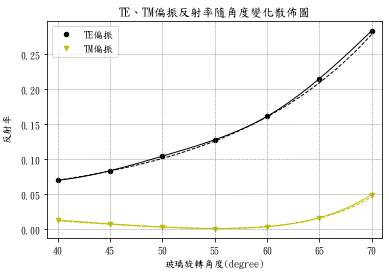

253
0.00017533865265841874
55.210420841683366
253
0.00017535148075717818
55.210420841683366


In [125]:
fig, ax= plt.subplots()

ax.set(xlabel = '玻璃旋轉角度(degree)', ylabel = '反射率', 
       title = "TE、TM偏振反射率隨角度變化散佈圖")   
ax.set_xlim(39, 71)

#Table_5
ax.scatter(x_1,
           y_TE_b,
           c = "k",
           s = 20,
           alpha = 1,
           label = 'TE偏振',
           marker = "o")

ax.plot(x_1_,
        y_TE_b_,
        linestyle = '-',
        linewidth = 1,
        c = "k")
#理論擬和
ax.plot(theta_i,
        R_E_b,
        linestyle = '--',
        linewidth = 1,
        c = "k")

#Table_6
ax.scatter(x_1,
           y_TM_b,
           c = "y",
           s = 20,
           alpha = 1,
           label = 'TM偏振',
           marker = "v")

ax.plot(x_1_,
        y_TM_b_,
        linestyle = '-',
        linewidth = 1,
        c = "y")

#理論擬和
ax.plot(theta_i,
        R_M_b,
        linestyle = '--',
        linewidth = 1,
        c = "y")

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.savefig('實驗5-1數據TM_TE.png', 
            dpi=500, 
            format='png')
plt.show()
print(np.argmin(y_TM_b_))
print(y_TM_b_[253])
print(x_1_[253])

print(np.argmin(R_M_b))
print(R_M_b[np.argmin(R_M_b)])
print(theta_i[np.argmin(R_M_b)])

In [103]:
#理論 TM
n_t = 1.443
theta_i_s = np.linspace(50, 60, 500)
theta_i_s_rad = np.radians(theta_i_s)
theta_t_s_rad = np.arcsin(np.sin(theta_i_s_rad)/n_t)


R_M_s = (np.tan(theta_i_s_rad-theta_t_s_rad)**2)/(np.tan(theta_i_s_rad+theta_t_s_rad))**2+0.0001633425268319911

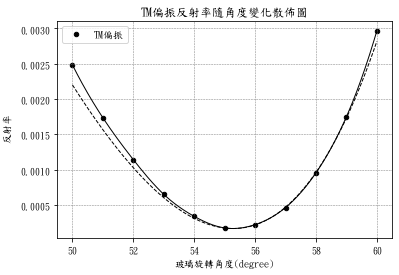

263
0.0001633425268319911
55.27054108216433
263
0.00016334776642453687
55.27054108216433


In [105]:
#Table_7
fig, ax= plt.subplots()

ax.set(xlabel = '玻璃旋轉角度(degree)', ylabel = '反射率', 
       title = "TM偏振反射率隨角度變化散佈圖")   

# ax.set_xlim(55, 56)
# ax.set_ylim(0, 0.0002)
#Table_7
ax.scatter(x_2,
           y_TM_s,
           c = "k",
           s = 20,
           alpha = 1,
           label = 'TM偏振',
           marker = "o")

ax.plot(x_2_,
        y_TM_s_,
        linestyle = '-',
        linewidth = 1,
        c = "k")

#理論擬和

ax.plot(theta_i_s,
        R_M_s,
        linestyle = '--',
        linewidth = 1,
        c = "k")

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.savefig('實驗5-1數據TM.png', 
            dpi=500, 
            format='png')
plt.show()

print(np.argmin(y_TM_s_))
print(y_TM_s_[263])
print(x_2_[263])
print(np.argmin(R_M_s))
print(R_M_s[263])
print(theta_i_s[263])

In [16]:



X_Mus = np.arange(0, 360, 0.1)
X_Mus_rad = np.radians(X_Mus)
Y_Mus = 0.5*np.cos(X_Mus_rad)**2


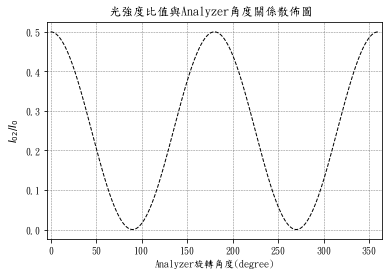

In [17]:
fig, ax= plt.subplots()

ax.set(xlabel = 'Analyzer旋轉角度(degree)', ylabel = r'$I_{02}/I_0$', 
       title = "光強度比值與Analyzer角度關係散佈圖 ")   
ax.set_xlim(-4, 364)

ax.plot(X_Mus, 
        Y_Mus, 
        linestyle = '--',
        linewidth = 1,
        label ="理論數值",
        c = "k")

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)



plt.savefig('Malus.png', 
            dpi=500, 
            )

plt.show()

In [18]:
# 例題6

n_t = 1.5
theta_i = np.linspace(0.001, 90, 500)
theta_i_rad = np.radians(theta_i)
theta_t_rad = np.arcsin(np.sin(theta_i_rad)/n_t)

R_E_b = -(np.sin(theta_i_rad-theta_t_rad))/(np.sin(theta_i_rad+theta_t_rad))
R_M_b = (np.tan(theta_i_rad-theta_t_rad))/(np.tan(theta_i_rad+theta_t_rad))

theta = np.arange(0.001, 91, 10)
theta_rad = np.radians(theta)
theta_tp_rad = np.arcsin(np.sin(theta_rad)/n_t)
R_E_p = -(np.sin(theta_rad-theta_tp_rad))/(np.sin(theta_rad+theta_tp_rad))
R_M_p = (np.tan(theta_rad-theta_tp_rad))/(np.tan(theta_rad+theta_tp_rad))


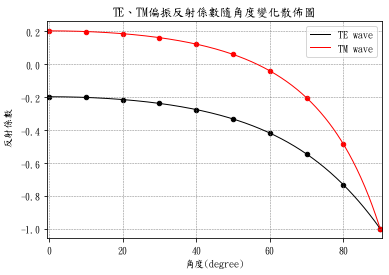

In [19]:
fig, ax= plt.subplots()

ax.set(xlabel = '角度(degree)', ylabel = '反射係數', 
       title = "TE、TM偏振反射係數隨角度變化散佈圖")   
ax.set_xlim(-0.5, 90.5)
#TE
ax.scatter(theta,
           R_E_p,
           c = "k",
           s = 20,
           alpha = 1,
           marker = "o")

ax.plot(theta_i,
        R_E_b,
        linestyle = '-',
        linewidth = 1,
        label ="TE wave",
        c = "k")
#TM
ax.scatter(theta,
           R_M_p,
           c = "r",
           s = 20,
           alpha = 1,
           marker = "o")

ax.plot(theta_i,
        R_M_b,
        linestyle = '-',
        linewidth = 1,
        label ="TM wave",
        c = "r")

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.savefig('例題6.png', 
            dpi=500, 
            format='png')
plt.show()

In [20]:
# 例題7

t_7 = np.linspace(1,4,500)
B_A = np.degrees(np.arctan(t_7))
t_7_p = np.arange(1,4.1,1)
B_A_p = np.degrees(np.arctan(t_7_p))

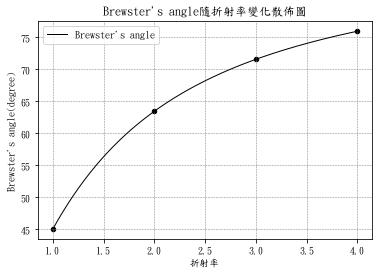

In [21]:
fig, ax= plt.subplots()

ax.set(xlabel = '折射率', ylabel = 'Brewster\'s angle(degree)', 
       title = "Brewster's angle隨折射率變化散佈圖")

ax.scatter(t_7_p,
           B_A_p,
           c = "k",
           s = 20,
           alpha = 1,
           marker = "o")

ax.plot(t_7,
        B_A,
        linestyle = '-',
        linewidth = 1,
        label ="Brewster's angle",
        c = "k")

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.savefig('例題7.png', 
            dpi=500, 
            format='png')
plt.show()